## CASE STUDY SOLUTION - Banking and Finance Analytics

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Data Preprocessing

In [2]:
# # Define the datasets which are in the form of Dictionary as pandas DataFrames
# 1.	Accounts Dataset: Information about customer accounts.
# 2.	Transactions Dataset: Tracks customer transactions.
# 3.	Loans Dataset: Details about loans issued to customers.

In [ ]:
# •	Load the datasets into pandas DataFrames.
# •	Check for and handle any missing data.
# •	Verify the data types are correct.

In [4]:
accounts = pd.DataFrame({
    'AccountNumber': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
    'CustomerID': [301, 302, 303, 301, 304, 305, 306, 307, 308, 309],
    'AccountType': ['Savings', 'Checking', 'Savings', 'Checking', 'Savings', 'Checking', 'Savings', 'Checking', 'Savings', 'Checking'],
    'Balance': [1200.50, 2500.75, 300.00, 1500.00, 5000.00, 800.25, 2200.00, 3500.50, 1450.75, 2200.50]
})

In [5]:
transactions = pd.DataFrame({
    'TransactionID': [201, 202, 203, 204, 205, 206, 207, 208, 209, 210],
    'AccountNumber': [101, 102, 103, 101, 105, 106, 107, 108, 109, 110],
    'TransactionAmount': [200.50, 150.75, 50.00, 120.00, 300.00, 500.00, 100.00, 220.50, 130.75, 180.00],
    'TransactionType': ['Debit', 'Credit', 'Debit', 'Credit', 'Debit', 'Debit', 'Credit', 'Debit', 'Credit', 'Debit'],
    'TransactionDate': ['2024-01-01', '2024-01-03', '2024-01-05', '2024-01-07', '2024-01-09', '2024-01-10', '2024-01-12', '2024-01-13', '2024-01-15', '2024-01-17']
})

loans = pd.DataFrame({
    'LoanID': [301, 302, 303, 304, 305, 306, 307, 308, 309, 310],
    'CustomerID': [301, 302, 303, 301, 304, 305, 306, 307, 308, 309],
    'LoanAmount': [5000.00, 10000.00, 2000.00, 3000.00, 15000.00, 7000.00, 4000.00, 12000.00, 5000.00, 8000.00],
    'InterestRate': [5.0, 4.5, 6.0, 5.5, 4.0, 5.0, 4.5, 5.5, 4.0, 4.5],
    'DefaultStatus': ['No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes']
})


## Task 2: Descriptive Statistics

In [5]:
# • 1 Generate descriptive statistics for the Balance in the Accounts dataset.
# •	2 Calculate the average and most common transaction amounts from the Transactions dataset.
# •	3 Generate statistics for loan amounts and defaults in the Loans dataset.

In [7]:
# 1. Descriptive statistics for Account Balance
account_balance_stats = accounts['Balance'].describe()

# Descriptive statistics for Transaction Amount( optional not asked in case study)
transaction_amount_stats = transactions['TransactionAmount'].describe()

print("\nTransaction Amount Stats:\n", transaction_amount_stats)


Transaction Amount Stats:
 count     10.000000
mean     195.250000
std      127.678415
min       50.000000
25%      122.687500
50%      165.375000
75%      215.500000
max      500.000000
Name: TransactionAmount, dtype: float64


In [8]:
# 2. Calculate the average and most common transaction amounts from the Transactions dataset.
average_transaction_amount=transactions['TransactionAmount'].mean()
# most_common_transaction_amount=transactions['TransactionAmount'].mode() 
most_common_transaction_amount=transactions['TransactionAmount'].mode()[0]
# here in our dataset, we have unique values. so mode() displayes all values in o/p. select the first mode by keeping mode()[0]

In [9]:
print("\nAverage Transaction Amount:", average_transaction_amount)
print("Most Common Transaction Amount:", most_common_transaction_amount)


Average Transaction Amount: 195.25
Most Common Transaction Amount: 50.0


In [15]:
# 3.1 •Generate statistics for loan amounts
loan_amount_stats=loans['LoanAmount'].describe()
print("\nLoan Amount Stats:\n", loan_amount_stats)


Loan Amount Stats:
 count       10.000000
mean      7100.000000
std       4175.324339
min       2000.000000
25%       4250.000000
50%       6000.000000
75%       9500.000000
max      15000.000000
Name: LoanAmount, dtype: float64


In [16]:
# 3.2 Generate defaults in the Loans dataset.
loan_default_status=loans['DefaultStatus'].value_counts()
print("\nLoan default status:\n", loan_default_status)


Loan default status:
 DefaultStatus
No     6
Yes    4
Name: count, dtype: int64


In [17]:
# # to give this output more clearly we can do this
# value_counts() gives → { 'No': 6, 'Yes': 4 }
# ['Yes'] picks only the count for "Yes"

In [23]:
loan_defaults = loans['DefaultStatus'].value_counts()['Yes']
loan_non_defaults = loans['DefaultStatus'].value_counts()['No']

print(f"Total defaults loans are : {loan_defaults}")
print(f"Total non default Loans: {loan_non_defaults}")

Total defaults loans are : 4
Total non default Loans: 6


In [24]:
# Calculate percentage rate of the defaults (optional - Didnt asked in the Case study)
default_rate_percentage= loans['DefaultStatus'].value_counts(normalize=True) * 100
print(f"percentage rate of the defaults: {default_rate_percentage}")

#Instead of raw counts, it gives proportions (fractions). To convert this into percentages just *100

percentage rate of the defaults: DefaultStatus
No     60.0
Yes    40.0
Name: proportion, dtype: float64


## Task 3: Data Analysis and Visualizations

In [26]:
# 1• Analyze the distribution of account balances.
# 2• Visualize the distribution of transaction amounts.
# 3• Identify outliers in account balances and loan amounts using box plots.
# 4• Investigate transaction activity by account type.

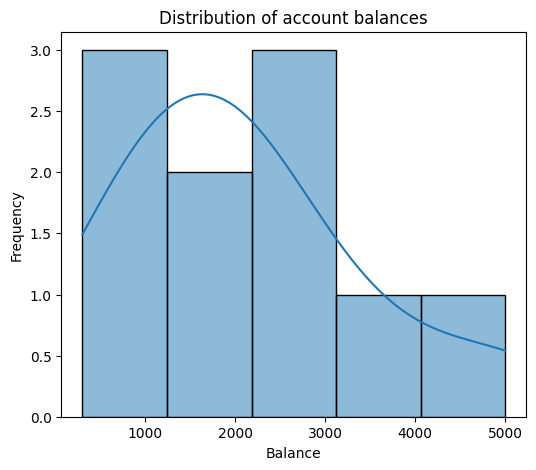

In [30]:
# 1• Analyze the distribution of account balances.
plt.figure(figsize=(6,5))
sns.histplot(accounts['Balance'],kde=True)
plt.title("Distribution of account balances")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.show()

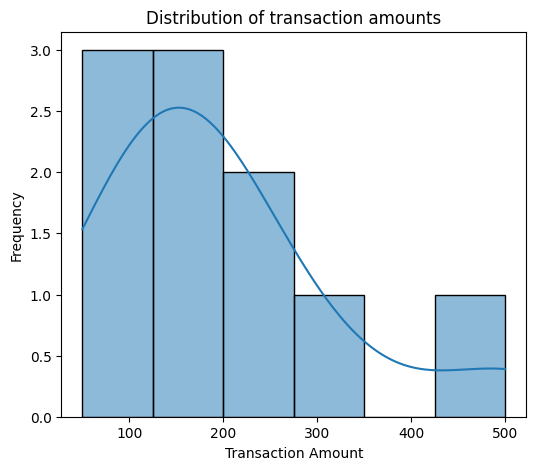

In [31]:
#3.2 Visualize the distribution of transaction amounts.
plt.figure(figsize=(6,5))
sns.histplot(transactions['TransactionAmount'],kde=True)
plt.title("Distribution of transaction amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

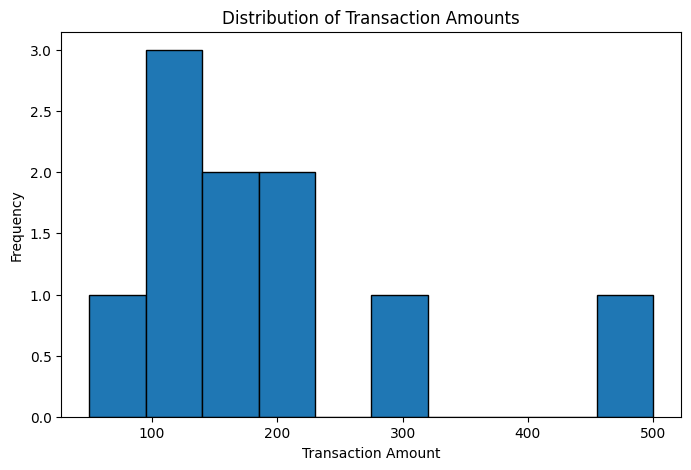

In [34]:
# same using only Matplotlib instead of seaborn, but here there is no kde in matplotlib. matplotlb dont have built_in kde 
# But you can still draw KDE using scipy:
plt.figure(figsize=(8,5))
plt.hist(transactions['TransactionAmount'], bins=10, edgecolor='black')
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


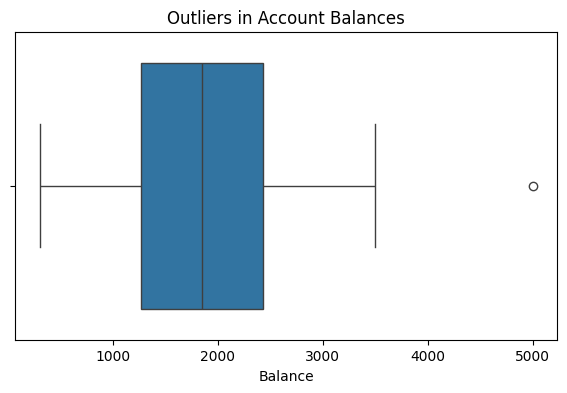

In [38]:
# 3.4 • Identify outliers in account balances
plt.figure(figsize=(7,4))
sns.boxplot(x=accounts['Balance'])
plt.title("Outliers in Account Balances")
plt.show()

Text(0.5, 1.0, 'Outliers in loan amounts')

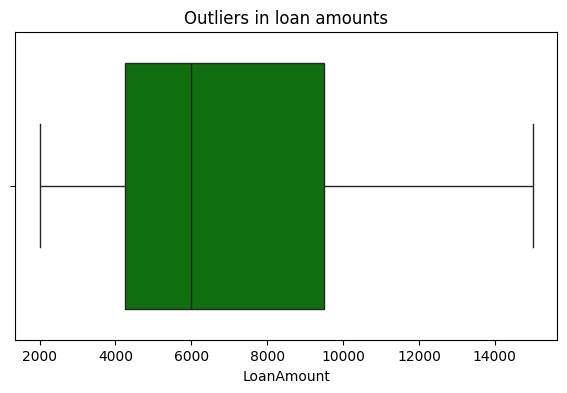

In [43]:
# 3.3 • Identify outliers in loan amounts using box plots.
plt.figure(figsize=(7,4))
sns.boxplot(x=loans['LoanAmount'], color='green')
plt.title("Outliers in loan amounts")
        

In [44]:
# 3.4	Investigate transaction activity by account type.
# This requires joining Accounts + Transactions using AccountNumber. Now we can analyze debit/credit activity by account type.
merged = transactions.merge(accounts, on='AccountNumber')
merged

,TransactionID,AccountNumber,TransactionAmount,TransactionType,TransactionDate,CustomerID,AccountType,Balance
0,201,101,200.50,Debit,2024-01-01,301,Savings,1200.50
1,202,102,150.75,Credit,2024-01-03,302,Checking,2500.75
2,203,103,50.00,Debit,2024-01-05,303,Savings,300.00
3,204,101,120.00,Credit,2024-01-07,301,Savings,1200.50
4,205,105,300.00,Debit,2024-01-09,304,Savings,5000.00
5,206,106,500.00,Debit,2024-01-10,305,Checking,800.25
6,207,107,100.00,Credit,2024-01-12,306,Savings,2200.00
7,208,108,220.50,Debit,2024-01-13,307,Checking,3500.50
8,209,109,130.75,Credit,2024-01-15,308,Savings,1450.75
9,210,110,180.00,Debit,2024-01-17,309,Checking,2200.50


In [45]:
# Plot: Transaction counts by account type

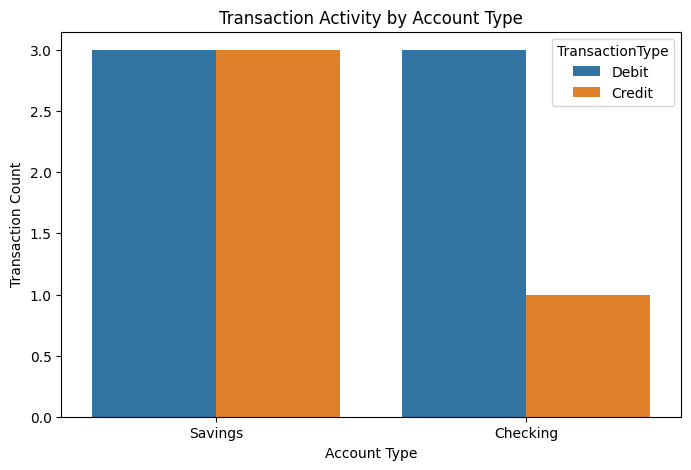

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(data=merged, x='AccountType', hue='TransactionType')
plt.title("Transaction Activity by Account Type")
plt.xlabel("Account Type")
plt.ylabel("Transaction Count")
plt.show()


In [47]:
# We can find, Do savings accounts have more transactions? Are checking accounts doing more debits? Which accounts are more active?

## Task 4: Data Merging

In [48]:
# 4.1 Merge Transactions and Accounts datasets
transactions_accounts = transactions.merge(accounts, on='AccountNumber')
transactions_accounts

,TransactionID,AccountNumber,TransactionAmount,TransactionType,TransactionDate,CustomerID,AccountType,Balance
0,201,101,200.50,Debit,2024-01-01,301,Savings,1200.50
1,202,102,150.75,Credit,2024-01-03,302,Checking,2500.75
2,203,103,50.00,Debit,2024-01-05,303,Savings,300.00
3,204,101,120.00,Credit,2024-01-07,301,Savings,1200.50
4,205,105,300.00,Debit,2024-01-09,304,Savings,5000.00
5,206,106,500.00,Debit,2024-01-10,305,Checking,800.25
6,207,107,100.00,Credit,2024-01-12,306,Savings,2200.00
7,208,108,220.50,Debit,2024-01-13,307,Checking,3500.50
8,209,109,130.75,Credit,2024-01-15,308,Savings,1450.75
9,210,110,180.00,Debit,2024-01-17,309,Checking,2200.50


In [49]:
# 4.2 Merge Loans and Accounts datasets
loans_accounts = loans.merge(accounts, on='CustomerID', how='left')
loans_accounts

,LoanID,CustomerID,LoanAmount,InterestRate,DefaultStatus,AccountNumber,AccountType,Balance
0,301,301,5000.0,5.0,No,101,Savings,1200.50
1,301,301,5000.0,5.0,No,104,Checking,1500.00
2,302,302,10000.0,4.5,Yes,102,Checking,2500.75
3,303,303,2000.0,6.0,No,103,Savings,300.00
4,304,301,3000.0,5.5,No,101,Savings,1200.50
5,304,301,3000.0,5.5,No,104,Checking,1500.00
6,305,304,15000.0,4.0,Yes,105,Savings,5000.00
7,306,305,7000.0,5.0,No,106,Checking,800.25
8,307,306,4000.0,4.5,No,107,Savings,2200.00
9,308,307,12000.0,5.5,Yes,108,Checking,3500.50


In [50]:
# 4.3 Combine previous results to create a comprehensive view # Show transactions + account details + loan details all in one table.
full_view = transactions_accounts.merge(loans, on='CustomerID', how='left')
full_view

,TransactionID,AccountNumber,TransactionAmount,TransactionType,TransactionDate,CustomerID,AccountType,Balance,LoanID,LoanAmount,InterestRate,DefaultStatus
0,201,101,200.50,Debit,2024-01-01,301,Savings,1200.50,301,5000.0,5.0,No
1,201,101,200.50,Debit,2024-01-01,301,Savings,1200.50,304,3000.0,5.5,No
2,202,102,150.75,Credit,2024-01-03,302,Checking,2500.75,302,10000.0,4.5,Yes
3,203,103,50.00,Debit,2024-01-05,303,Savings,300.00,303,2000.0,6.0,No
4,204,101,120.00,Credit,2024-01-07,301,Savings,1200.50,301,5000.0,5.0,No
5,204,101,120.00,Credit,2024-01-07,301,Savings,1200.50,304,3000.0,5.5,No
6,205,105,300.00,Debit,2024-01-09,304,Savings,5000.00,305,15000.0,4.0,Yes
7,206,106,500.00,Debit,2024-01-10,305,Checking,800.25,306,7000.0,5.0,No
8,207,107,100.00,Credit,2024-01-12,306,Savings,2200.00,307,4000.0,4.5,No
9,208,108,220.50,Debit,2024-01-13,307,Checking,3500.50,308,12000.0,5.5,Yes


In [51]:
# Task 5: Financial Performance Analysis
# •	Calculate total transaction amounts by account type.
# •	Analyze loan performance by default status.
# •	Investigate trends in transaction activity over time.
